## Feature Engineering

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns'  , None)
sns.set_theme()

In [326]:
df = pd.read_csv('../data/raw/train.csv')

In [327]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [328]:
df = df.drop(columns=['PassengerId'] , axis = 1)

### 1. Extract the Mr. Mrs. from the Name

In [329]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [330]:
def extractTitles(x : str) -> str:
    
    # first split the name on ','
    # then select the second ele from list 
    # then again split on '.' and select the first element
    return x.split(',')[1].split('.')[0].replace(' ' , '').casefold()

In [331]:
df['Title'] = df['Name'].apply(extractTitles)

In [332]:
df['Title'].unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'thecountess',
       'jonkheer'], dtype=object)

In [333]:
# merge the synonms
df['Title'] = df['Title'].replace(['mlle', 'ms'], 'miss')
df['Title'] = df['Title'].replace('mme', 'mrs')

In [334]:
# Create a other category
rare_titles = ['don', 'rev', 'dr', 'major', 'lady', 'sir', 'col', 'capt', 'thecountess', 'jonkheer']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

check how these titles make difference on survival rates

<Axes: xlabel='Title', ylabel='count'>

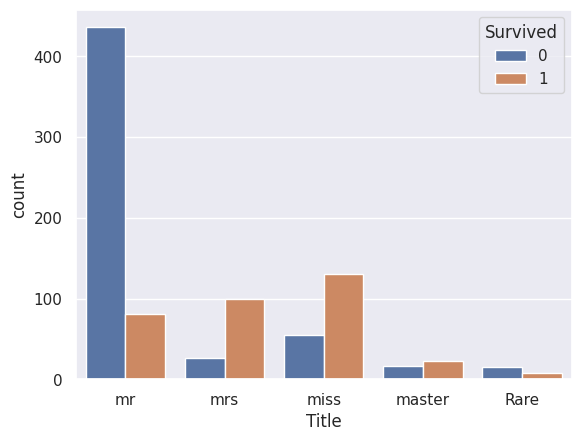

In [335]:
sns.countplot(data = df , x ='Title' , hue = 'Survived')

In [336]:
# we dont need name anymore hence can be dropped
df.drop(columns=['Name'] , axis = 1 , inplace=True)

In [337]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,mr


### 2. Create a Family Column

In [338]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<Axes: xlabel='FamilySize', ylabel='count'>

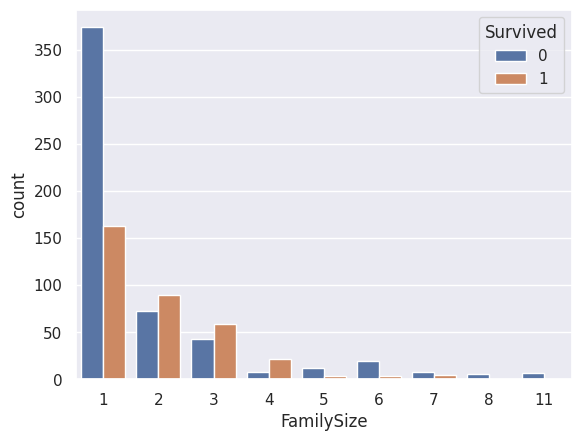

In [339]:
sns.countplot(data = df , x = 'FamilySize' , hue = 'Survived')

bin the family into alone , small family and large family

In [340]:
def binFamily(x : int) -> str:
    if x == 1:
        return 'alone'
    if x >=2 and x <= 4:
        return 'small'
    return 'large'

In [341]:
df['FamilyGroup'] = df['FamilySize'].apply(binFamily)
df.drop(columns=['Parch' , 'SibSp'] , axis = 1 , inplace=True)

<Axes: xlabel='FamilyGroup', ylabel='count'>

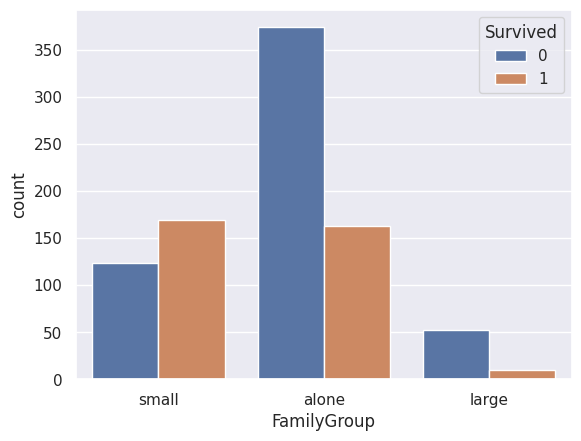

In [342]:
sns.countplot(data = df , x = 'FamilyGroup' , hue = 'Survived')

### 3. Create Deck Feature

In [343]:
df['Deck'] = df['Cabin'].apply(lambda x : x[0] if type(x) == str else 'U')

In [344]:
df['Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<Axes: xlabel='Deck', ylabel='count'>

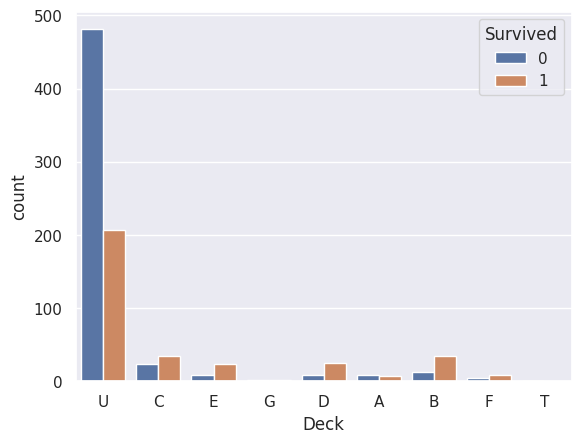

In [345]:
sns.countplot(data = df , x = 'Deck' , hue = 'Survived')

In [346]:
df['HasCabin'] = df['Cabin'].apply(lambda x: 1 if type(x) == str else 0)

<Axes: xlabel='HasCabin', ylabel='count'>

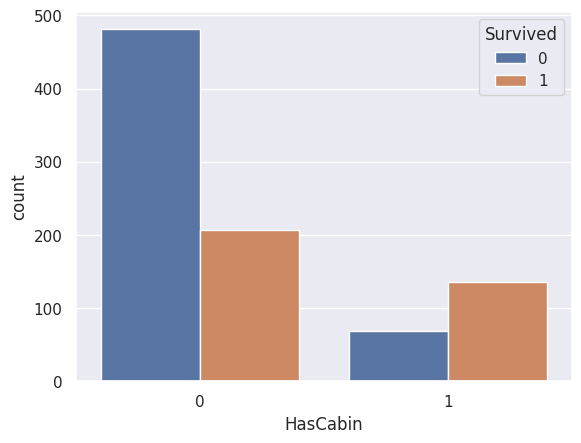

In [347]:
sns.countplot(data = df , x = 'HasCabin' , hue = 'Survived')

if you have a cabin there is a bit higher chance that a person survived

### 4. Use Fare to Create Fare Per person 

In [ ]:
df['FarePerPerson'] = np.log1p(df['Fare'] / df['FamilySize']) # log transformation

<Axes: xlabel='FarePerPerson', ylabel='Count'>

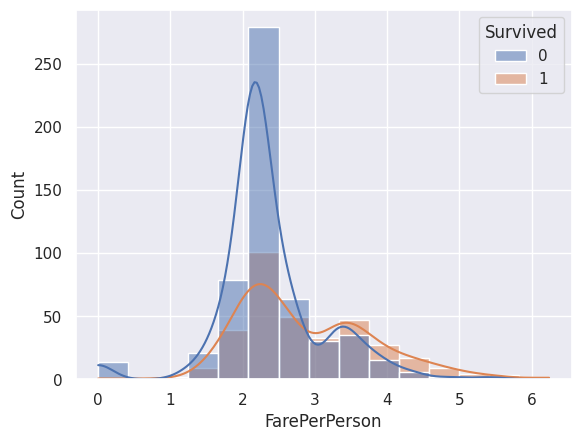

In [ ]:
sns.histplot(data = df , x = 'FarePerPerson' , hue = 'Survived' , bins = 15 , kde = True) 

### 5. Binning Numerical Features

In [357]:
def createAgeGroup(x : int) -> str :

    if x >= 0 and x <= 12 :
        return 'Child'
    elif x >= 13 and x <= 18:
        return 'Teen'
    elif x >= 18 and x <= 60:
        return 'Adult'
    return 'Senior'

In [358]:
df['AgeGroup'] = df['Age'].apply(createAgeGroup)

<Axes: xlabel='AgeGroup', ylabel='count'>

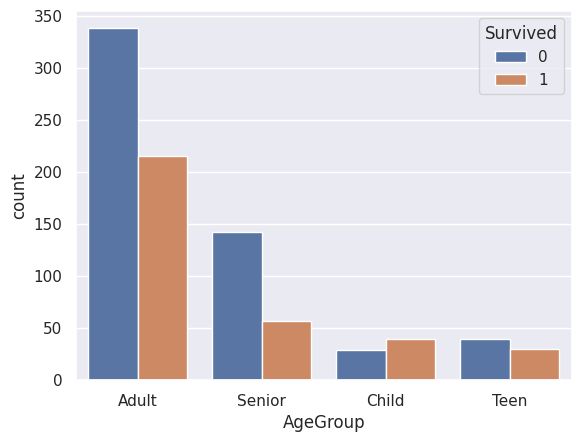

In [360]:
sns.countplot(data = df , x = 'AgeGroup' , hue = 'Survived')

In [361]:
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

<Axes: xlabel='FareGroup', ylabel='count'>

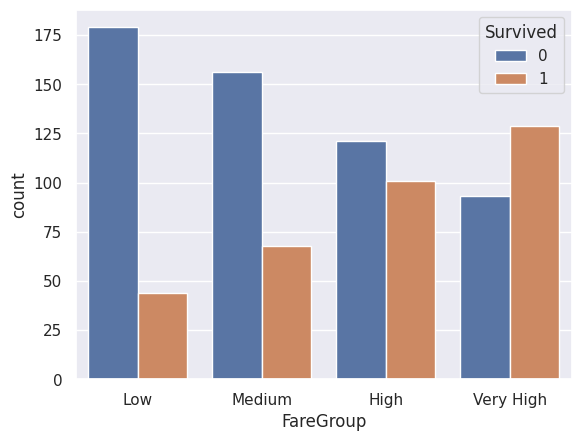

In [362]:
sns.countplot(data = df , x = 'FareGroup' , hue = 'Survived')

In [363]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyGroup,Deck,HasCabin,FarePerPerson,AgeGroup,FareGroup
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,mr,2,small,U,0,1.531476,Adult,Low
1,1,1,female,38.0,PC 17599,71.2833,C85,C,mrs,2,small,C,1,3.601186,Adult,Very High
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,miss,1,alone,U,0,2.188856,Adult,Medium
3,1,1,female,35.0,113803,53.1000,C123,S,mrs,2,small,C,1,3.316003,Adult,Very High
4,0,3,male,35.0,373450,8.0500,NaN,S,mr,1,alone,U,0,2.202765,Adult,Medium


In [366]:
df.drop(columns=['Ticket' , 'Cabin'] , axis = 1 , inplace=True)

In [367]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,FamilyGroup,Deck,HasCabin,FarePerPerson,AgeGroup,FareGroup
0,0,3,male,22.0,7.2500,S,mr,2,small,U,0,1.531476,Adult,Low
1,1,1,female,38.0,71.2833,C,mrs,2,small,C,1,3.601186,Adult,Very High
2,1,3,female,26.0,7.9250,S,miss,1,alone,U,0,2.188856,Adult,Medium
3,1,1,female,35.0,53.1000,S,mrs,2,small,C,1,3.316003,Adult,Very High
4,0,3,male,35.0,8.0500,S,mr,1,alone,U,0,2.202765,Adult,Medium


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    object  
 3   Age            714 non-null    float64 
 4   Fare           891 non-null    float64 
 5   Embarked       889 non-null    object  
 6   Title          891 non-null    object  
 7   FamilySize     891 non-null    int64   
 8   FamilyGroup    891 non-null    object  
 9   Deck           891 non-null    object  
 10  HasCabin       891 non-null    int64   
 11  FarePerPerson  891 non-null    float64 
 12  AgeGroup       891 non-null    object  
 13  FareGroup      891 non-null    category
dtypes: category(1), float64(3), int64(4), object(6)
memory usage: 91.7+ KB


Fill the missing values

In [386]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [385]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [387]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    object  
 3   Age            891 non-null    float64 
 4   Fare           891 non-null    float64 
 5   Embarked       891 non-null    object  
 6   Title          891 non-null    object  
 7   FamilySize     891 non-null    int64   
 8   FamilyGroup    891 non-null    object  
 9   Deck           891 non-null    object  
 10  HasCabin       891 non-null    int64   
 11  FarePerPerson  891 non-null    float64 
 12  AgeGroup       891 non-null    object  
 13  FareGroup      891 non-null    category
dtypes: category(1), float64(3), int64(4), object(6)
memory usage: 91.7+ KB


## Next Step would be converting all this into machine learning pipelines so its easy to work and make it modular